In [1]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data/beacon_coords.txt', beacon_data_file='../data/bluetoothData-4m-1700.txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon_data", beacon_data)
print(type(beacon_data))


# actual_coords_df = pd.DataFrame(actual_coords)

# # Convert beacon_data to a DataFrame
# beacon_data_df = pd.DataFrame(beacon_data)

# print("Actual Coordinates DataFrame:")
# print(actual_coords_df)
# print(actual_coords_df.dtypes)

# print("\nBeacon Data DataFrame:")
# print(beacon_data_df)
# print(beacon_data_df.dtypes)


beacon_data [[{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -70, 'accuracy': 39.833273094050156, 'time': 1724057755404}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -76, 'accuracy': 89.57094250551359, 'time': 1724057756060}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -81, 'accuracy': 168.33636078435438, 'time': 1724057757101}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -75, 'accuracy': 78.58155583957935, 'time': 1724057757616}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -70, 'accuracy': 39.833273094050156, 'time': 1724057758272}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -69, 'accuracy': 34.59438414037775, 'time': 1724057758901}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724057759521}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724057760468}], [{'uuid': '88400000-0000-0000-0

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt

def equation1(distance, A, B, C):
    return A * (distance ** B) + C

def equation2(distance, n):
    return -49 - 10 * n * np.log10(distance)

def equation3(distance, txPower, n):
    return txPower - 10 * n * np.log10(distance)


filename_to_median_mean_rssi = {
    'bluetoothData_1.3m.txt': -50.69,
    'bluetoothData_2.4m.txt': -56.91,
    'bluetoothData_3.8m.txt': -61.36,
    
    'bluetoothData-10m-1807.txt': -76.86,
    'bluetoothData-1m-1609.txt': -55.47,
    'bluetoothData-2m-1639.txt': -60.51,
    'bluetoothData-3m-1651.txt': -63.83,
    'bluetoothData-4m-1700.txt': -65.65,
    'bluetoothData-5m-1710.txt': -65.83,
    'bluetoothData-6m-1726.txt': -70.87,
    'bluetoothData-7m-1734.txt': -77.83,
    'bluetoothData-8m-1742.txt': -77.27,
    'bluetoothData-9m-1758.txt': -74.67,
}


# Extract distances and RSSI values from filename_to_median_mean_rssi
distances = []
rssi_values = []
for filename, rssi in filename_to_median_mean_rssi.items():
    match = re.search(r'(\d+(?:\.\d+)?)m', filename)
    if match:
        distance = float(match.group(1))
        distances.append(distance)
        rssi_values.append(rssi)

# Convert to numpy arrays
distances = np.array(distances)
rssi_values = np.array(rssi_values)

# Fit the equations
popt1, _ = curve_fit(equation1, distances, rssi_values)
A, B, C = popt1

popt2, _ = curve_fit(equation2, distances, rssi_values)
n2 = popt2[0]

popt3, _ = curve_fit(equation3, distances, rssi_values)
txPower, n3 = popt3

# Generate points for plotting
plot_distances = np.linspace(min(distances), max(distances), 100)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(distances, rssi_values, label='Measured RSSI', alpha=0.5)
plt.plot(plot_distances, equation1(plot_distances, A, B, C), 'r-', label=f'Fit 1: {A:.2f}(d^{B:.2f}) + {C:.2f}')
plt.plot(plot_distances, equation2(plot_distances, n2), 'g-', label=f'Fit 2: -49 - {10*n2:.2f}log10(d)')
plt.plot(plot_distances, equation3(plot_distances, txPower, n3), 'b-', label=f'Fit 3: {txPower:.2f} - {10*n3:.2f}log10(d)')
plt.xlabel('Distance (m)')
plt.ylabel('RSSI')
plt.title('RSSI vs Distance: Fitted Models')
plt.legend()
plt.grid(True)
plt.show()

print(f"Equation 1 parameters: A={A:.2f}, B={B:.2f}, C={C:.2f}")
print(f"Equation 2 parameters: n={10*n2:.2f}")
print(f"Equation 3 parameters: txPower={txPower:.2f}, n={10*n3:.2f}")

NameError: name 'filename_to_median_mean_rssi' is not defined

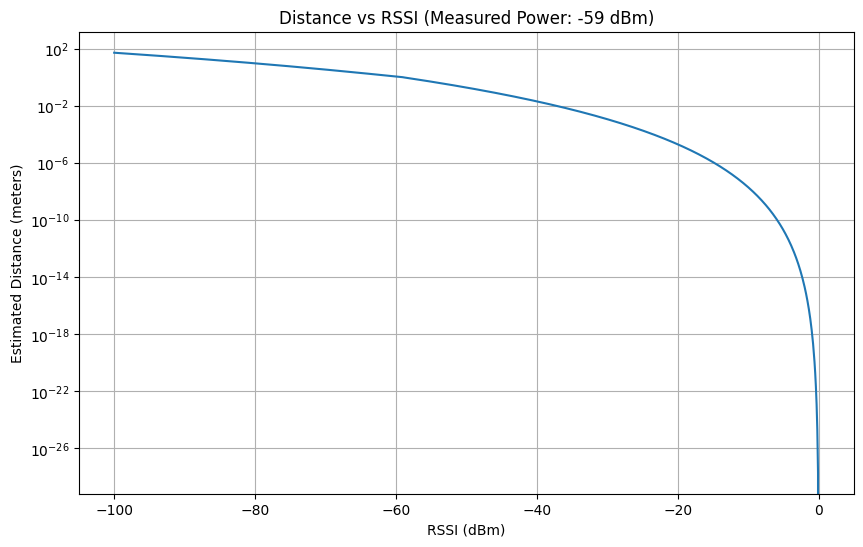

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(measured_power, rssi):
    if rssi == 0:
        return -1.0  # if we cannot determine distance, return -1.
    
    ratio = rssi / measured_power
    if ratio < 1.0:
        return ratio ** 10
    else:
        distance = 0.89976 * (ratio ** 7.7095) + 0.111
        return distance

# Function to draw the curve
def draw_distance_curve(measured_power):
    rssi_values = np.linspace(-100, 0, 1000)  # RSSI range from -100 to 0
    distances = [calculate_distance(measured_power, rssi) for rssi in rssi_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(rssi_values, distances)
    plt.title(f'Distance vs RSSI (Measured Power: {measured_power} dBm)')
    plt.xlabel('RSSI (dBm)')
    plt.ylabel('Estimated Distance (meters)')
    plt.grid(True)
    plt.yscale('log')  # Use log scale for y-axis due to exponential nature
    plt.show()

# Example usage
measured_power = -59  # Example value, adjust as needed
draw_distance_curve(measured_power)



In [ ]:
def get_acc_strongest_beacons(beacon_data, beacon_coords):
    strongest_uuids, signal_strengths = process_beacon_data(beacon_data)
    return [beacon_coords[uuid] for uuid in strongest_uuids]

def rssi_to_distance(rssi):
    txPower = -59
    n = 2.0
    return 10 ** ((txPower - rssi) / (10 * n))

In [ ]:
# Plot the dynamic positions

plt.figure(figsize=(10, 6))

plt.scatter(actual_coords['x'], actual_coords['y'], c='green', label='Actual Coordinates')
plt.scatter(estimated_coords['x'], estimated_coords['y'], c='red', label='Estimated Coordinates')

plt.title('Estimated vs Actual Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

KeyError: 'x'

<Figure size 1000x600 with 0 Axes>